In [78]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

__Section 1:__ Definition of our data, collected from the code "data_collection_using_yahoo-finance"

In [35]:
prices = pd.read_csv('sp500_joined_closes.csv', delimiter=',', index_col='Date')
prices

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,28.304659,6.950151,NaN,18.375000,NaN,1.151060,16.561329,14.468750,NaN,30.397175,...,NaN,NaN,8.204436,50.431610,33.010357,NaN,4.633274,NaN,45.304596,NaN
2000-01-03,27.292488,6.698944,NaN,18.250000,NaN,1.235628,16.145748,15.500000,NaN,29.482208,...,NaN,NaN,7.994064,53.765923,33.940575,NaN,4.475831,NaN,42.482033,NaN
2000-01-04,26.208023,6.507545,NaN,17.812500,NaN,1.198042,14.791295,14.625000,NaN,28.313084,...,NaN,NaN,8.178138,51.265186,33.169189,NaN,4.385864,NaN,40.424904,NaN
2000-01-05,26.967150,6.495581,NaN,18.000000,NaN,1.202740,15.083735,15.000000,NaN,28.618069,...,NaN,NaN,8.493693,53.904873,32.443199,NaN,4.408358,NaN,40.377071,NaN
2000-01-06,29.136089,6.722870,NaN,18.031250,NaN,1.179249,15.206868,16.000000,NaN,28.846809,...,NaN,NaN,8.414804,52.793427,29.629946,NaN,4.370872,NaN,40.951149,NaN
2000-01-07,29.714483,6.794642,NaN,17.937500,NaN,1.212137,15.945663,16.250000,NaN,29.405956,...,NaN,NaN,8.414804,54.043797,32.987701,NaN,4.273407,NaN,41.046829,NaN
2000-01-10,29.569895,6.746791,NaN,20.500000,NaN,1.273214,16.561329,17.500000,NaN,30.727568,...,NaN,NaN,8.414804,52.793427,34.666569,NaN,4.445844,NaN,40.305271,NaN
2000-01-11,29.063784,6.651092,NaN,19.812500,NaN,1.329592,15.422350,17.250000,NaN,30.880070,...,NaN,NaN,8.414804,52.237701,31.898685,NaN,4.415856,NaN,38.176411,NaN
2000-01-12,29.136089,6.591341,NaN,19.593750,NaN,1.273214,15.345394,18.125000,NaN,31.515453,...,NaN,NaN,8.598877,52.098766,31.898685,NaN,4.370872,NaN,38.511295,NaN


__Section 2:__ Visualization of a correlatino matrix of the S&P 500 stocks

           MMM       ABT  ABBV      ABMD       ACN
MMM   1.000000  0.794533   NaN -0.125641  0.849417
ABT   0.794533  1.000000   NaN  0.176281  0.944942
ABBV       NaN       NaN   NaN       NaN       NaN
ABMD -0.125641  0.176281   NaN  1.000000  0.602260
ACN   0.849417  0.944942   NaN  0.602260  1.000000


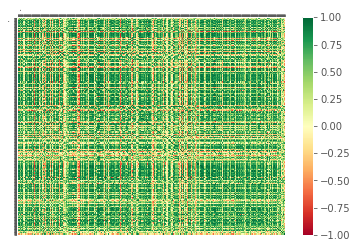

<Figure size 1800x1800 with 0 Axes>

In [31]:
def visualize_data_as_colormap():
    data_frame = prices
    df_corr = data_frame.corr()
    print(df_corr.iloc[0:5,0:5])

    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    heat_map = ax.pcolor(data, cmap='RdYlGn')
    fig.colorbar(heat_map)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
#     Show the labels of the table (with 500 stocks it's meaningless)
    columns_labels = '.'                             #data_frame_correlation.columns
    rows_labels = '.'                                #data_frame_correlation.index
    ax.set_xticklabels(columns_labels)
    ax.set_yticklabels(rows_labels)

    plt.xticks(rotation=90)
    heat_map.set_clim(-1, 1)
    
    size=25
    plt.figure(figsize= (size, size))
    plt.show()
    
visualize_data_as_colormap()

__Section 3:__ Definition of clusters within our dataframe of S&P 500 prices

Text(0.5, 1.0, 'Elbow curve')

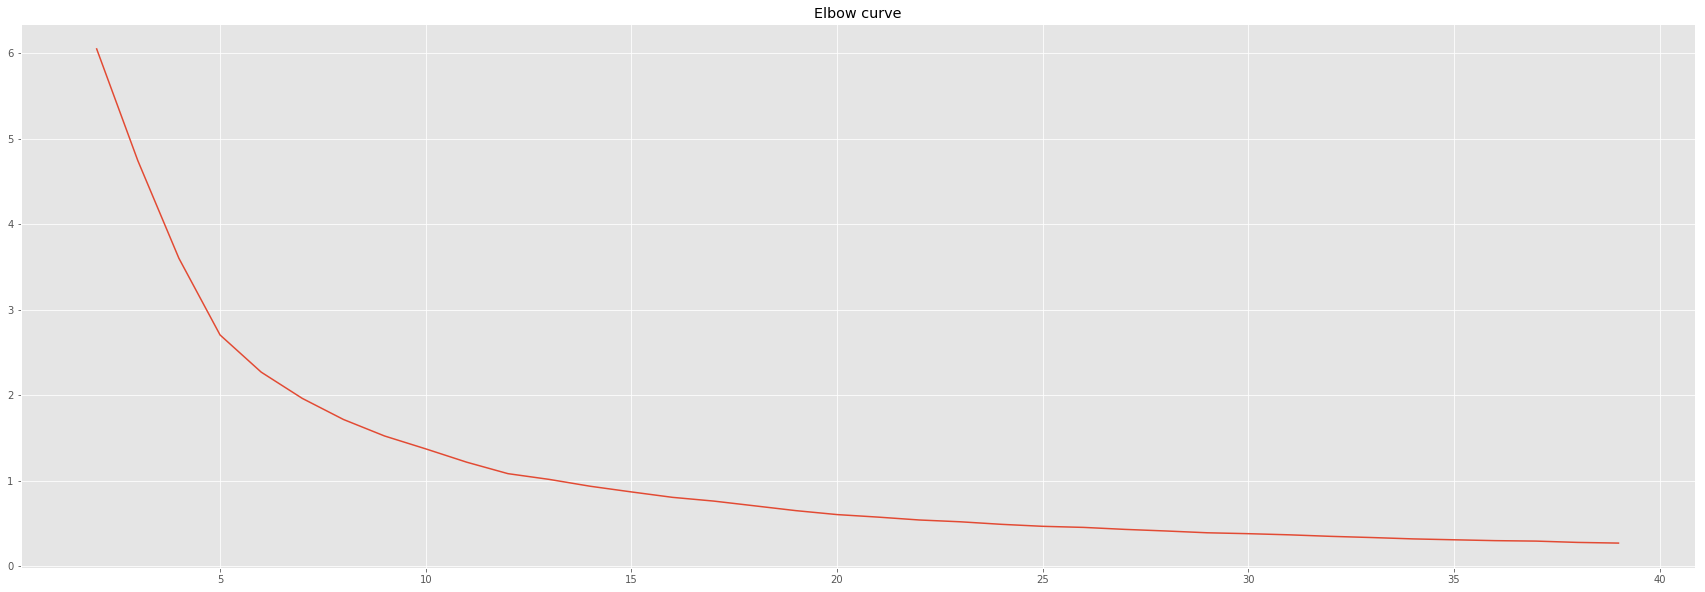

In [75]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
prices_df = pd.read_csv("sp500_joined_closes.csv", index_col='Date')
returns = prices.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

X = data
distorsions = []
for k in range(2, 40):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(30, 10))
plt.plot(range(2, 40), distorsions)
plt.grid(True)
plt.title('Elbow curve')

We choose a number of 5 clusters as the elbow curve seem to "break" around 5 clusters

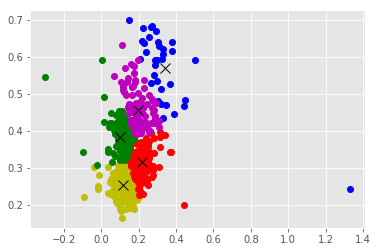

In [95]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1], 'x',markersize=10, c='black')
show()

Handling of outliers be erasing them

In [68]:
#identify the outlier here, we will drop the outliers that make our cluster to shrink
print(returns.idxmax())
returns.head()

Returns        LW
Volatility    UAL
dtype: object


,Returns,Volatility
MMM,0.126382,0.229674
ABT,0.151099,0.236304
ABBV,0.233680,0.273847
ABMD,0.326722,0.594747
ACN,0.189105,0.303027


In [80]:
#drop the relevant stock from our data
returns.drop(['NFLX', 'INCY', 'DOW', 'AKAM'],inplace=True)

# #recreate data to feed into the algorithm
# data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

End of section 3: Save our cluster in a list identified by name of ticker and the respective cluster numero

In [8]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
print(type(details))

for detail in details:
    print(detail)

cluster = pd.DataFrame(details).set_index(0)
cluster.to_csv('clusterize_ticker')
cluster.columns = ['cluster']
cluster

<class 'list'>
('MMM', 4)
('ABT', 4)
('ABBV', 2)
('ABMD', 0)
('ACN', 2)
('ATVI', 3)
('ADBE', 3)
('AMD', 0)
('AAP', 2)
('AES', 1)
('AMG', 1)
('AFL', 1)
('A', 1)
('APD', 4)
('ALK', 0)
('ALB', 1)
('ARE', 2)
('ALXN', 2)
('ALGN', 0)
('ALLE', 0)
('AGN', 4)
('ADS', 4)
('LNT', 2)
('ALL', 4)
('GOOGL', 4)
('GOOG', 2)
('MO', 2)
('AMZN', 2)
('AEE', 0)
('AAL', 4)
('AEP', 0)
('AXP', 4)
('AIG', 1)
('AMT', 0)
('AWK', 1)
('AMP', 4)
('ABC', 1)
('AME', 2)
('AMGN', 2)
('APH', 4)
('APC', 2)
('ADI', 1)
('ANSS', 1)
('ANTM', 3)
('AON', 2)
('AOS', 4)
('APA', 2)
('AIV', 1)
('AAPL', 1)
('AMAT', 3)
('APTV', 1)
('ADM', 2)
('ARNC', 4)
('ANET', 1)
('AJG', 3)
('AIZ', 4)
('ATO', 2)
('T', 4)
('ADSK', 4)
('ADP', 3)
('AZO', 4)
('AVB', 2)
('AVY', 2)
('BHGE', 4)
('BLL', 1)
('BAC', 2)
('BK', 1)
('BAX', 1)
('BBT', 4)
('BDX', 1)
('BRK-B', 4)
('BBY', 4)
('BIIB', 1)
('BLK', 3)
('HRB', 2)
('BA', 1)
('BKNG', 2)
('BWA', 0)
('BXP', 2)
('BSX', 2)
('BMY', 1)
('AVGO', 4)
('BR', 3)
('BF-B', 2)
('CHRW', 2)
('COG', 2)
('CDNS', 3)
('CPB',

,cluster
0,
MMM,4
ABT,4
ABBV,2
ABMD,0
ACN,2
...,...
XYL,3
YUM,4
ZBH,1


__Section 4:__ Simulation of random portfolio independently of clusters

(Will serve as a benchmark to compare our final results)

In [102]:
import pandas as pd  
import numpy as np
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
mean_returns = df.pct_change().mean()
mean_returns.head()

MMM     0.000502
ABT     0.000600
ABBV    0.000927
ABMD    0.001297
ACN     0.000750
dtype: float64

In [103]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [105]:
# Simulation of random allocation
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 10000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

ValueError: Shape of passed values is (10000, 508), indices imply (10000, 507)

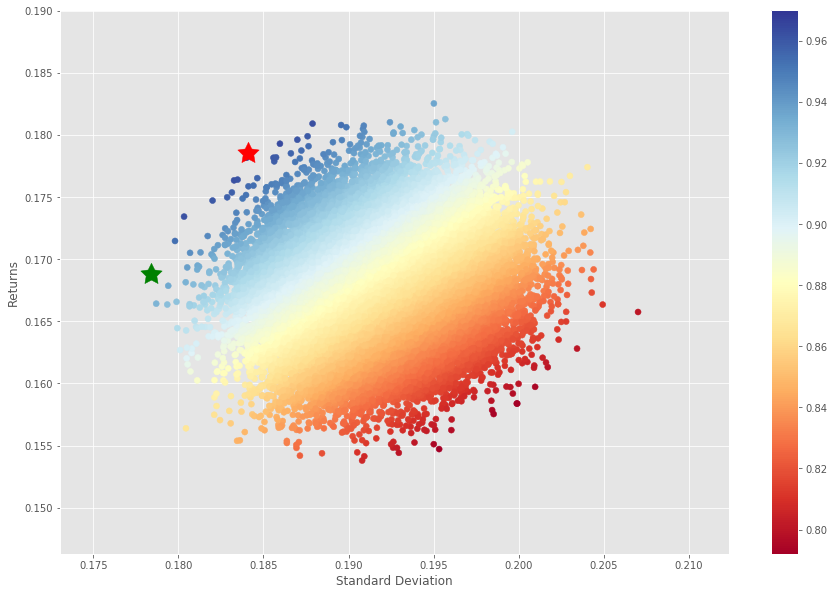

In [301]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [104]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std

def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

min_port_variance = min_variance(mean_returns, cov)

NameError: name 'cov' is not defined

In [304]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

Now we will replicate this process but instead of using a blind selection of 500 stocks, we will use a random allocation inside of each previously determined clusters, (notice that by doing so we will considerably reduce the computation process)

In [97]:
df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
tickers = list(df.columns.values)
tickers.remove('APC')
tickers = tickers
ticker = tickers

cluster0 = (cluster.loc[cluster['cluster'] == 0.0])
cluster0 = list(cluster0.index.values)

cluster1 = (cluster.loc[cluster['cluster'] == 1.0])
cluster1 = list(cluster1.index.values)

cluster2 = (cluster.loc[cluster['cluster'] == 2.0])
cluster2 = list(cluster2.index.values)

cluster3 = (cluster.loc[cluster['cluster'] == 3.0])
cluster3 = list(cluster3.index.values)

cluster4 = (cluster.loc[cluster['cluster'] == 4.0])
cluster4 = list(cluster4.index.values)

print(cluster0)

NameError: name 'cluster' is not defined

In [296]:
# we create a new dataframe that contain our cluster by numero
tickers = cluster4

df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
df = df.loc[:, cluster0]
# df1 = df.loc[:, cluster1]
# df2 = df.loc[:, cluster2]
# df3 = df.loc[:, cluster3]
# df4 = df.loc[:, cluster4]

df.head()

,AES,AMG,AFL,A,ALB,AIG,AMT,AWK,ABC,ADI,...,UPS,VTR,DIS,WM,WELL,WRK,WYNN,XEL,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,30.397175,26.537998,5.790693,48.090481,6.018779,1074.767578,26.839050,NaN,2.979260,32.215256,...,43.370342,1.719621,22.879309,10.705185,4.201318,NaN,NaN,8.204436,NaN,45.304596
2000-01-03,29.482208,24.117994,5.491572,44.785961,5.646281,1033.143555,25.741337,NaN,3.052822,31.241013,...,42.152538,1.642623,23.368179,10.821970,4.270761,NaN,NaN,7.994064,NaN,42.482033
2000-01-04,28.313084,22.190193,5.345844,41.364811,5.646281,980.337036,25.466908,NaN,2.844396,29.660543,...,40.816856,1.642623,24.737026,10.783047,4.253399,NaN,NaN,8.178138,NaN,40.424904
2000-01-05,28.618069,21.656973,5.315165,38.798946,5.744305,982.666077,26.235310,NaN,3.065082,30.093563,...,42.741810,1.616957,25.763666,10.821970,4.374925,NaN,NaN,8.493693,NaN,40.377071
2000-01-06,28.846809,22.313244,5.422544,37.321625,5.940357,1012.642273,25.960884,NaN,3.298029,29.270847,...,42.741810,1.642623,24.737026,10.744119,4.600616,NaN,NaN,8.414804,NaN,40.951149


In [ ]:
# Simulation of random allocation
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 50000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

In [302]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
df_sharpe = max_sharpe_port.to_frame().T
# max_sharpe = max_sharpe_port.to_frame().T
# max_sharpe.to_csv('max_sharpe_SP500')

df_sharpe = pd.DataFrame(list(df_sharpe.iloc[:,3:].T.index.values))
df_sharpe.to_csv('cluster4_maxsharpe')

In [307]:
df_minsd = pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T
df_minsd.to_csv('opti_minsd_cluster4')

In [303]:
df_var = min_vol_port.to_frame().T
df_var = pd.DataFrame(list(df_var.iloc[:,3:].T.index.values))
df.to_csv('cluster4_minsd')

In [305]:
df_opti_sharpe = pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T
df_opti_sharpe.to_csv('opti_sharpe_cluster4')

__Section 5:__ Investigation of maximum sharpe ratio within each cluster__

1) We simulate random portfolio on each of this cluster

2) Saved the result as a list of tickers (cf. random_portfolio simulation)

In [297]:
mean_returns = df.pct_change().mean()
mean_returns.head()

df_cmean = pd.concat([cluster, mean_returns], axis=1)
df_cmean.columns = ['cluster', 'return']

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


__Section 5:__ Concatenate the optimized list of stocks into a single list

In [43]:
list0 = pd.read_csv('opti_sharpe_cluster0')
list1 = pd.read_csv('opti_sharpe_cluster1')
list2 = pd.read_csv('opti_sharpe_cluster2')
list3 = pd.read_csv('opti_sharpe_cluster3')
list4 = pd.read_csv('opti_sharpe_cluster4')

weightlist0 = list0.iloc[:,:][list0.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist1 = list1.iloc[:,:][list1.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist2 = list2.iloc[:,:][list2.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist3 = list3.iloc[:,:][list3.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist4 = list4.iloc[:,:][list4.iloc[:,:]>0].dropna(axis=1).T.index.values

all_ticker = np.concatenate((weightlist0, weightlist1, weightlist2, weightlist3, weightlist4), axis=None)
print(all_ticker, len(all_ticker))

FileNotFoundError: [Errno 2] File b'opti_sharpe_cluster0' does not exist: b'opti_sharpe_cluster0'

In [298]:
cluster0_return = (df_cmean.loc[df_cmean['cluster'] == 0.0])
cluster1_return = (df_cmean.loc[df_cmean['cluster'] == 1.0])
cluster2_return = (df_cmean.loc[df_cmean['cluster'] == 2.0])
cluster3_return = (df_cmean.loc[df_cmean['cluster'] == 3.0])
cluster4_return = (df_cmean.loc[df_cmean['cluster'] == 4.0])